In [1]:
# 사이킷런의 데이터 셋을 불러온다.
import sklearn.datasets

# 많이 사용하는 패키지 import
# numpy : 배열을 관리하기 위한 패키지, pandas : 데이터프레임(tabular data set) 사용을 위한 패키지
# visual library : seaborn, matplotlib 으로 둘 다 많이 사용됨.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# visualize 결과물을 노트북에 보여주겠다.
%matplotlib inline

In [2]:
data = sklearn.datasets.load_iris()

In [5]:
# 사이킷런에서 load하면 모든 데이터의 타입은 bunch임.
# bunch 타입은 기본적으로 키를 가지며 키를 주면 자료가 나온다.
# 'DESCR' : 설명(description)
# filename : 원본 파일명이 어디에 있는지. 경로
# data : feature라고 하는 독립변수, x에 해당하는 feature_names 라는 이름을 가짐 
# target : 추정한 값 종속변수, y에 해당하는 target_names 라는 이름을 가짐
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['DESCR', 'target', 'feature_names', 'target_names', 'filename', 'data'])


In [4]:
# key 로 주어진 5가지 필드를 다 넣어보고 타입을 확인해본다.
for f in data.keys():
    # 키명과 타입 출력
    t = type(data[f])
    print('key: {}, type: {}'.format(f, t))
    
    # 만약 ndarray라면 shape까지 출력
    if t == np.ndarray:
        print('shape: {}'.format(data[f].shape))

dict_keys(['DESCR', 'target', 'feature_names', 'target_names', 'filename', 'data'])
key: DESCR, type: <class 'str'>
key: target, type: <class 'numpy.ndarray'>
shape: (150,)
key: feature_names, type: <class 'list'>
key: target_names, type: <class 'numpy.ndarray'>
shape: (3,)
key: filename, type: <class 'str'>
key: data, type: <class 'numpy.ndarray'>
shape: (150, 4)


아래 shape에서 ndarray(150, 3)에서 앞쪽 150이 데이터 수, 4가 feature의 개수다.

In [6]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# 데이터프레임 생성. 
# data : (150,3), column : feature_names(4 종류)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
# 데이터프레임에 열 추가한다. target은 y(0, 1, 2) 어떤 종에 해당하는지.
df['species'] = data.target
# 보기 쉽게 각각의 인덱스 대신에 실질적인 값으로 변환한다. 
# 0 -> setosa, 1 -> versicolor, 2 -> virginica
df['species'] = df['species'].apply(lambda x: data['target_names'][x])

In [11]:
df.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [12]:
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [13]:
# 150행 5열 데이터프레임
print(df.shape)

(150, 5)


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


위에서 봐야 할 것
- count의 개수가 모두 동일하므로 결측치가 없음. (150개로 동일)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
df.isnull().head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [18]:
# 결측치를 체크해서 합을 내보니..
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

결측치 처리방법 중에, 평균으로 처리하는 방법이 있다고 한다.

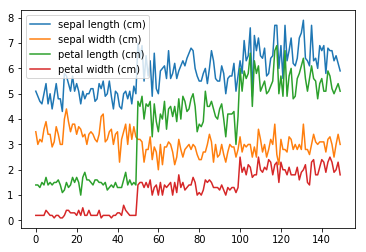

In [20]:
# 그래프로 그리면 각 종마다 50/50/50개씩 성향이 비슷함을 확인할 수 있다.
df.plot()

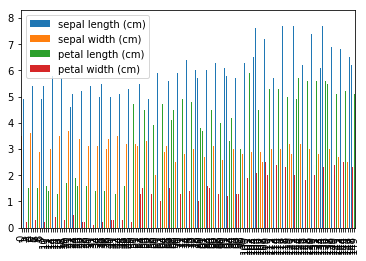

In [21]:
df.plot.bar()

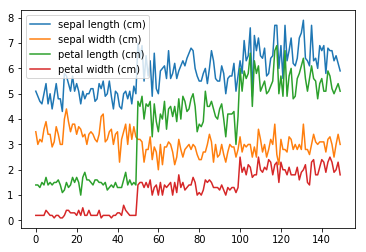

In [22]:
df.plot.line()

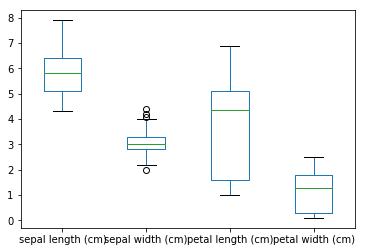

In [23]:
# 최댓값, 최솟값, outlier 등을 확인할 수 있음.
df.plot.box()

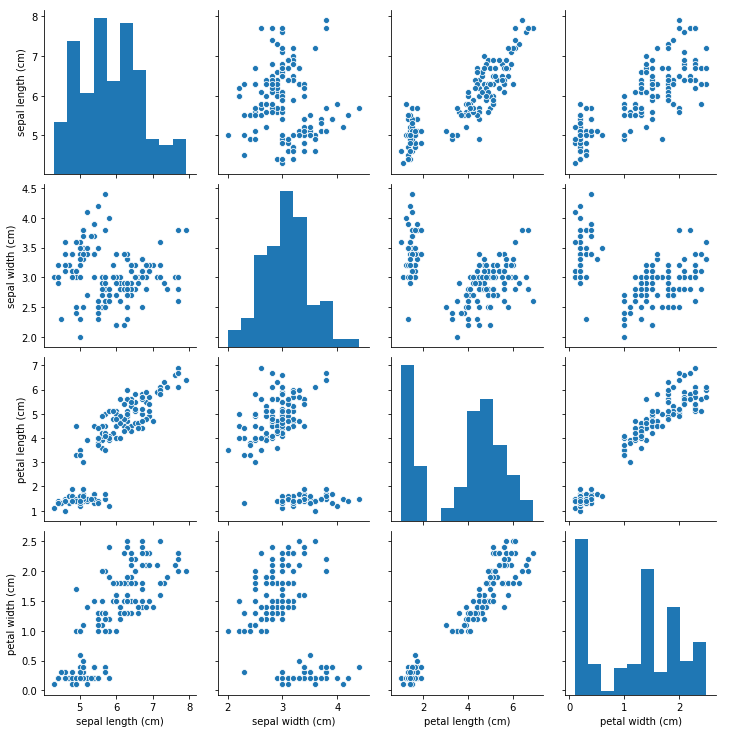

In [24]:
# seaborn 라이브러리 / 상관관계를 나타내는 그래프
# 한 가지 예로, petal width 와 sepal length 는 그래프의 모양이 양의 상관관계가 있다. 라고 생각할 수 있음.
sns.pairplot(df)

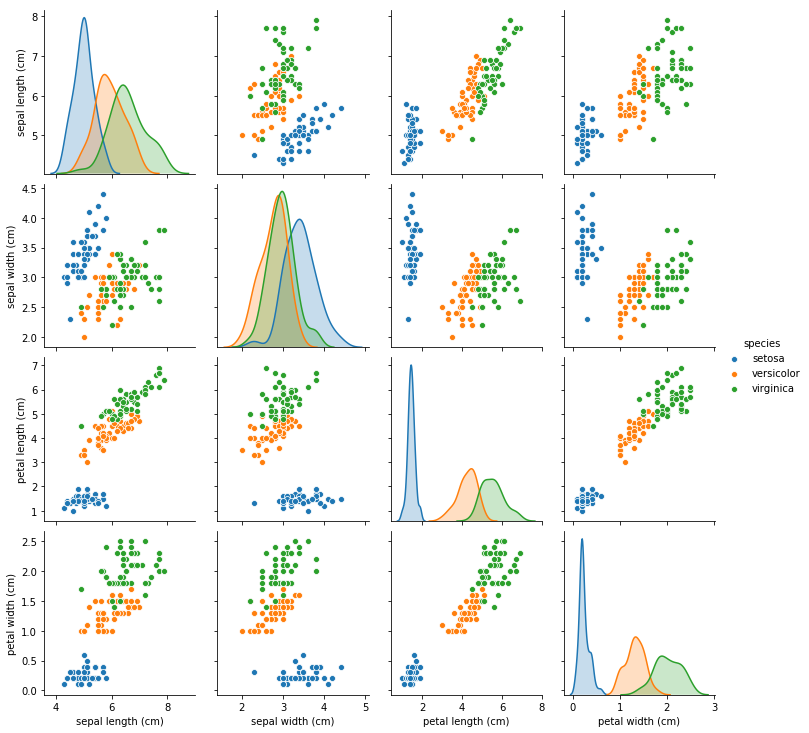

In [25]:
# species마다 색을 다르게 해서 그래프를 보여줄 수 있음
# 같은 필드는 히스토그램으로 표현되는 것을 알 수 있음.
# 분포를 통해서도 확인가능. setosa는 구분이 비교적 잘 되는 편.
# 같은 종끼리는 모여 있는 편이다. -> 어떤 값을 기준으로 종을 구분할 수 있을까? 를 판단가능
sns.pairplot(df, hue = 'species')

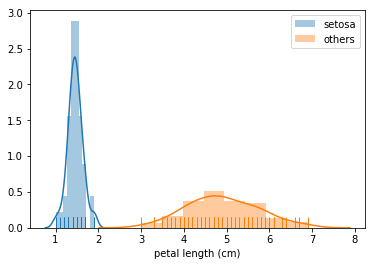

In [26]:
# species가 setosa인 것과 그렇지 않은 것을 나누어 히스토그램을 그려본다.
# 기준은 petal length인데 setosa가 값의 범위가 정해져 있어 구분이 되는 것을 알 수 있다.
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa") # 히스토그램을 그린다, 
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

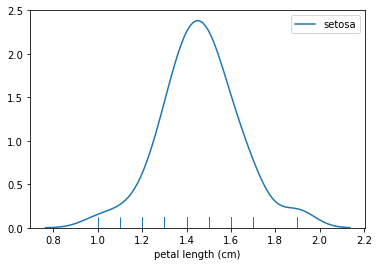

In [27]:
# rugplot 이라고 한다.
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=False, rug=True, label="setosa") 
plt.legend()
plt.show()

[]

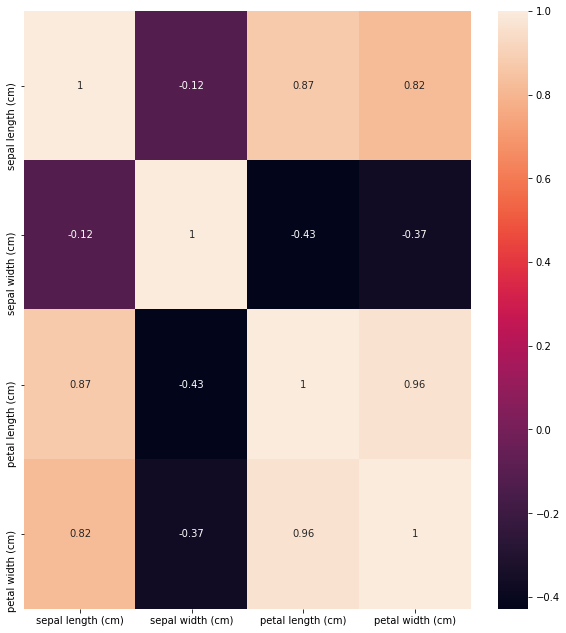

In [28]:
# 자기 자신과의 관계는 1이 나옴.
# petal length와 petal width는 0.96으로 가장 큰 양의 상관관계가 있음을 알 수 있음.
# 0.82, 0.87도 높은 편이다.
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

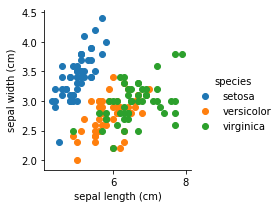

In [29]:
# FacetGrid - 복수개 그래프를 그린다. 여기서는 hue와 species(문자열)를 쉽게 쓰기 위해 사용
sns.FacetGrid(df,hue='species') \
.map(plt.scatter,'sepal length (cm)','sepal width (cm)') \
.add_legend()

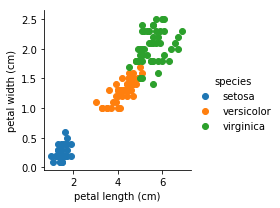

In [30]:
# 위 facetgrid보다는 petal length, petal width로 찍는게 구분이 더 쉽다.
sns.FacetGrid(df,hue='species') \
.map(plt.scatter,'petal length (cm)','petal width (cm)') \
.add_legend()
plt.show()

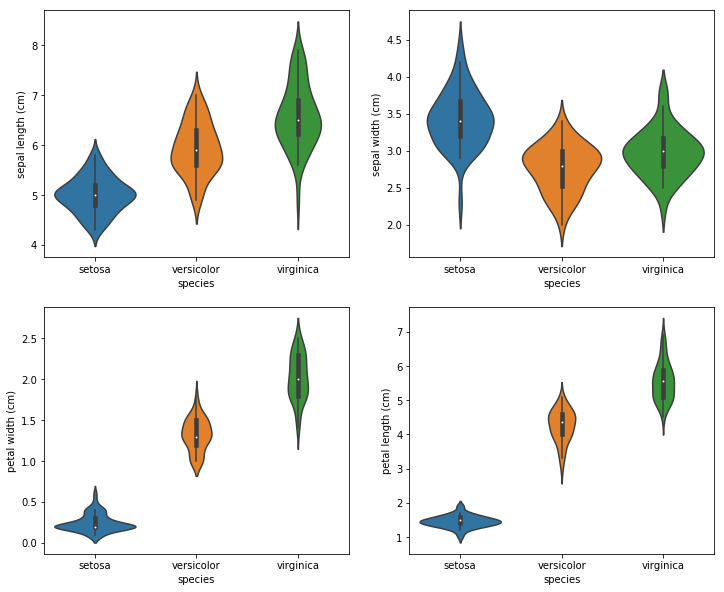

In [31]:
# violinplot으로 카테고리컬 데이터의 분포가 어떻게 되어있는지를 species별로 보여준다.
# 분포가 넓게 되어있는가? 
# 결과를 보면, sepal length와 sepal width는 서로 겹치는 부분이 많은 반면
# petal width와 petal length는 겹치는 부분이 많이 없어 구분이 쉬운 편이다.
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal length (cm)',data=df) 
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal width (cm)',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal width (cm)',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal length (cm)',data=df)

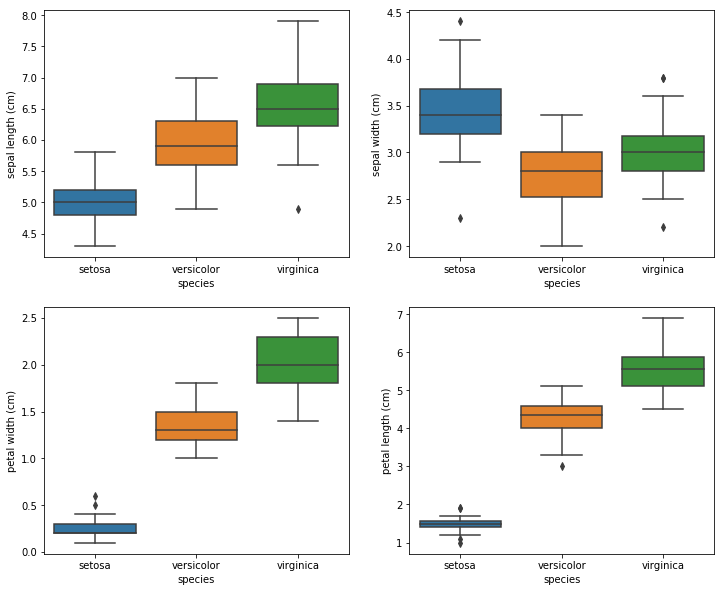

In [32]:
# boxplot으로 데이터 집합의 범위와 중앙값 확인, outlier(너무 바깥으로 나간 값이 있는지) 확인
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal length (cm)',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal width (cm)',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal width (cm)',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal length (cm)',data=df)

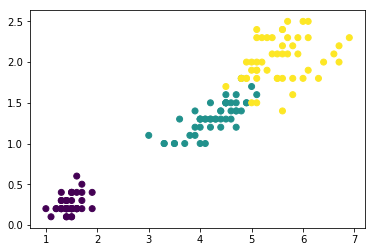

In [33]:
# species를 숫자로 변환하여 scatter그래프를 그릴 수 있다.
# x는 petal length, y는 petal width 다.
df['species'] = data.target 
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'], c=df['species'])